# Homework 3 - 95-791 Data Mining (Fall 2021) 
## Name: Xi Yan
#### Due: Sunday, December 5th, 2021


### Changing the author field and file name.

 (a) Change the `name:` field on the Rmd document from Your Name Here to your own name.

 (b) Rename this file to "Homework3_F21_YourHameHere.ipynb", where YourNameHere is changed to your own name.


### Installing and loading packages

Before you begin this Lab make sure you have installed all the required libraries. Load the libraries as indicated below.

You only need to install libraries once.  Once they're installed, you may use them by **importing** the libraries using the `import` command.  For today's lab, you'll want to run the following code


In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn import tree
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
#from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from yellowbrick.datasets import load_nfl
from sklearn.datasets import fetch_california_housing
%matplotlib inline
plt.style.use('seaborn-white')



---

### Question 1 - RandomForests [ 22 pts]


**1)a) Read the `heart_failure_clinical_records_dataset`, convert any categorical variable to numerical and print the first 5 rows of the dataset.** [1 pts]

In [67]:
# Read csv
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
# Convert sex into 0 and 1 dummy variable
df['sex'] = df['sex'].astype('category').cat.codes
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,0,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,1,0,8,1


**1)b) Divide intro training and testing datasets, with a 20-80 ratio. Print out your y_test dataset.** [1 pts]

In [68]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']
# Split train test set with 20-80 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# Store feature names from columns of X
feature_names = X.columns
print(y_test)

230    1
111    0
146    0
212    0
84     1
250    0
129    0
18     1
232    0
24     1
223    0
6      1
13     1
64     0
211    0
202    0
298    0
101    0
33     0
46     1
191    0
68     1
206    0
291    0
14     0
214    0
175    0
71     0
178    0
233    0
294    0
152    0
130    0
43     0
106    0
144    1
91     0
215    0
225    0
45     1
186    1
295    0
173    0
277    0
103    0
229    0
70     0
235    0
1      1
113    1
221    0
12     1
241    0
61     1
267    0
244    0
154    0
11     1
63     1
39     1
Name: DEATH_EVENT, dtype: int64


**1)c)Build a DecisionTreeClassifier with your datasets. Plot the generated tree. How good are your classification results?** [2 pts]

**Note: you may use any function we learned in Lab 3 to plot your DecisionTreeClassifier

In [69]:
# Build DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Fit the dataset
clf.fit(X_train, y_train)
# Output classification report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.62      0.56      0.59        18

    accuracy                           0.77        60
   macro avg       0.72      0.71      0.71        60
weighted avg       0.76      0.77      0.76        60



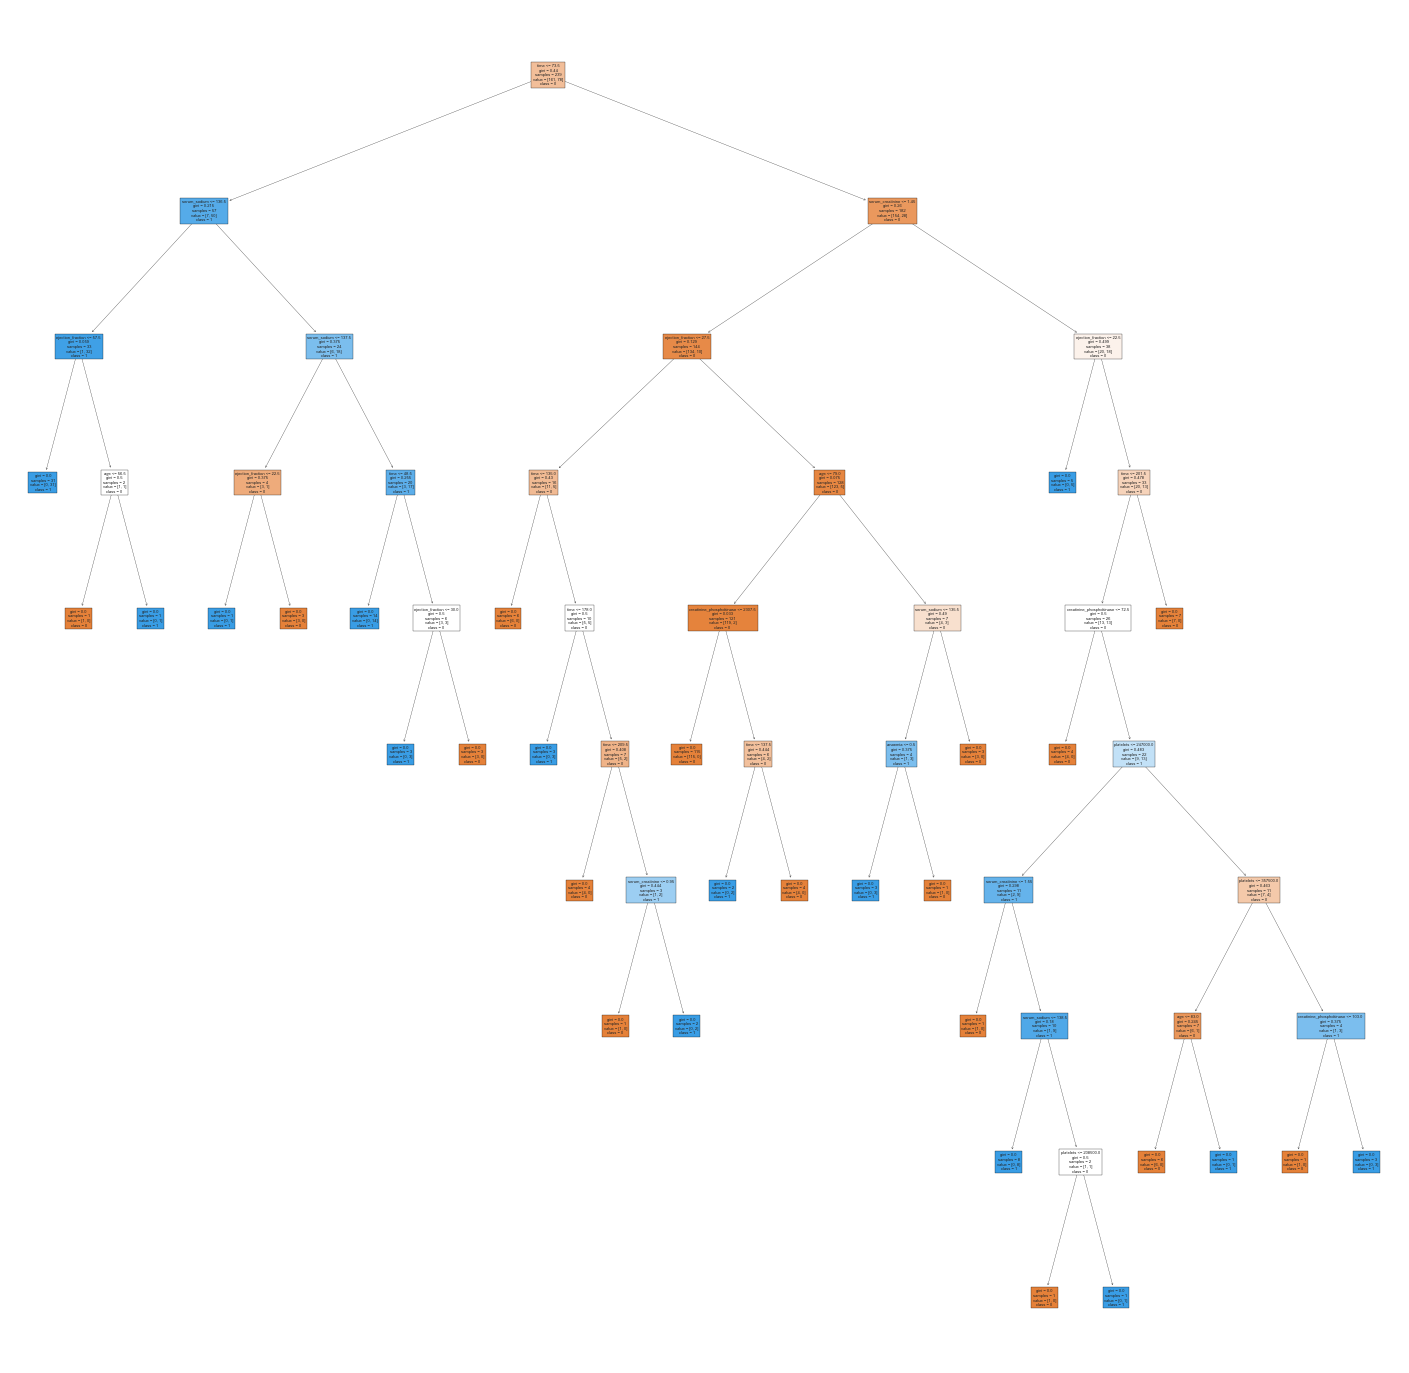

In [70]:
# Plot decision tree
fig = plt.figure(figsize=(25, 25))
plot_tree = tree.plot_tree(clf,
                           feature_names=feature_names,
                           class_names=['0', '1'],
                           filled=True)


--> Your Answer Here

The result is relatively not good, I would say, since it only has 75% percent of accracy overall. The prediction on DEATH_EVENT = 0 is 83%, which is more precise than the prediction on DEATH_EVENT = 1, which is 58%.

**1)d) Repeat the process the process from 1)c) but this time using a RandomForestClassifier. How good are your results?** [4 pts]

In [71]:
# Build RandomForestClassifier with 500 estimators and sqrt as the features
rf = RandomForestClassifier(n_estimators=500, random_state=1, max_features='sqrt')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
# Output classification report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.81      0.72      0.76        18

    accuracy                           0.87        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.86      0.87      0.86        60



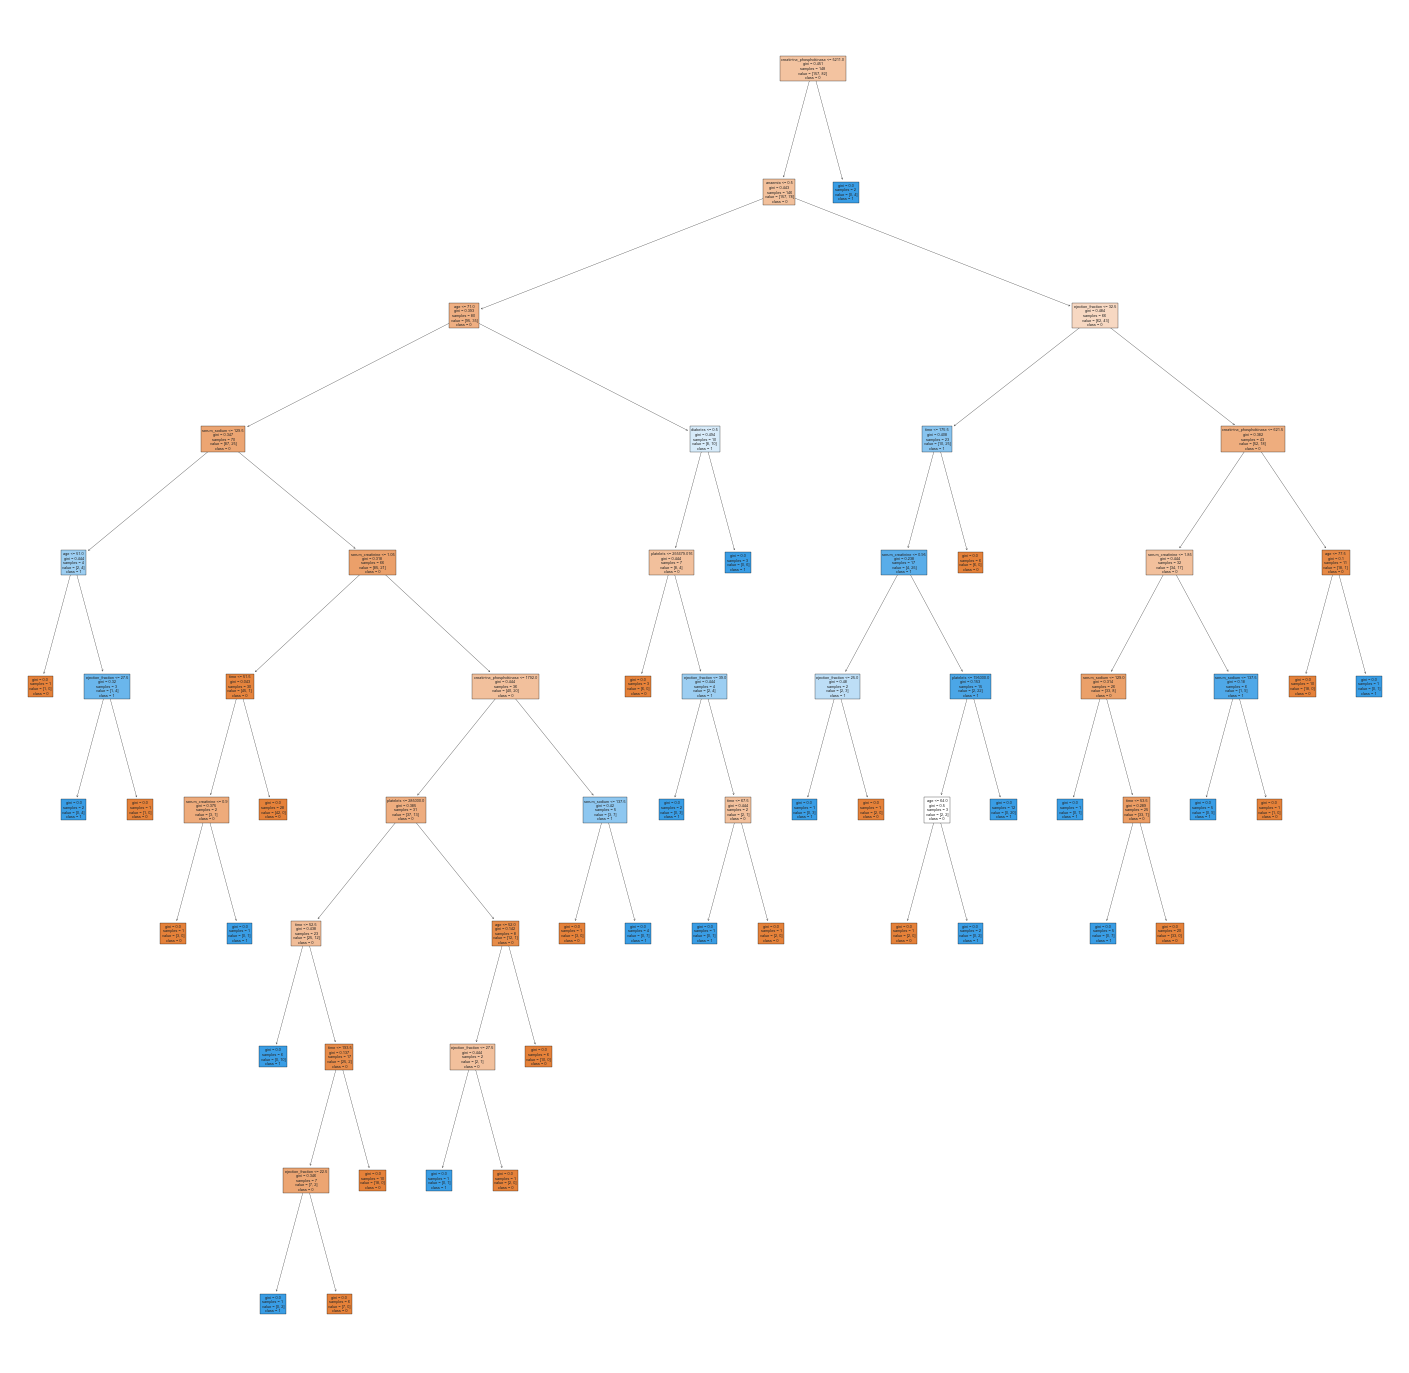

In [72]:
# Plot the 51th RandomForest tree of 500 estimators
fig = plt.figure(figsize=(25, 25))
plot_single_random_forest = tree.plot_tree(rf[50],
                           feature_names=feature_names,
                           class_names=['0', '1'],
                           filled = True)

--> Your Answer Here

The result from RandomForest is better than decision tree classification. The overall accuracy is 87%, with both higher precision on predicting DEATH_EVENT = 0 and 1, which are 89% and 81%. This is a significant improvement for DEATH_EVENT = 1.

**1)e) Repeat the process the process from 1)d) but this time tune the number of trees (n_estimators) in your RF. You can use CV to tune your RF. Plot your number of trees against your CV score. What is your best number of trees?** [6 pts]
**Hint: try a minimum of 20 trees, all the way to 500 trees.

In [73]:
# Initiate empty lists
num_tree = []
cv_score = []

# Use for loop to run RandomForestClassification of using 25 different n_estimators and with features of sqrt
for i in range(20, 520, 20):
    rf = RandomForestClassifier(n_estimators=i, random_state=1, max_features='sqrt')
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    # Generate cross validation score using the scoring method of negative MSE
    cv = abs(np.mean(cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')))
    # Append CV score into the empty list
    cv_score.append(cv)
    num_tree.append(i)


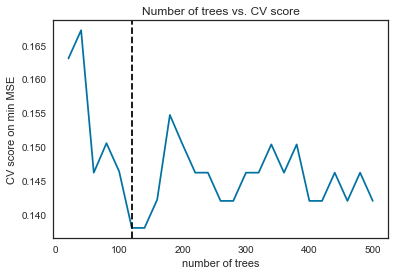

The n_estimator with the highest CV score is 120


In [74]:
# Plot the Number of trees vs. CV score graph
plt.plot(num_tree, cv_score)
plt.axvline(num_tree[cv_score.index(min(cv_score))], linestyle='--', color='black')
plt.xlabel("number of trees")
plt.ylabel("CV score on min MSE")
plt.title("Number of trees vs. CV score")
plt.show()
# Print the n_estimator with the lowest MSE, which is highest CV score
print('The n_estimator with the highest CV score is', num_tree[cv_score.index(min(cv_score))])

In [75]:
# Build RandomForestClassifier with 120 estimators and sqrt as the features
rf = RandomForestClassifier(n_estimators=120, random_state=1, max_features='sqrt')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
# Print classification report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.80      0.67      0.73        18

    accuracy                           0.85        60
   macro avg       0.83      0.80      0.81        60
weighted avg       0.85      0.85      0.85        60



--> Your Answer Here

Tried 25 total number of times. The best number of trees with the highest CV score on minimum MSE is 120.

**1)f) Random Forest have a few parameters we can tune. We could tune each one separately through CV, or we could use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to try all our parameters at one. This is called hyperparameter tuning. Read the documentation to run GridSearchCV on at least 3 different parameter from your RandomForest. Once you've obtained the best parameters, re-train your RandomForest with them and report your results. Did this results improve compared to 1)e)?** [6 pts]

In [76]:
# Create the parameters dictionary that tune n_estimators and max_features
parameters = {'n_estimators':range(20, 520, 20), 'max_features':['sqrt', 'log2']}
# Initialize the classifier
rf = RandomForestClassifier(random_state=1)
# Perform grid search on the classifier using the tuned parameters
clf = GridSearchCV(rf, param_grid=parameters)
clf.fit(X_train,y_train)
# print the best max_features and the best n_estimators
print(clf.best_params_)

{'max_features': 'sqrt', 'n_estimators': 400}


In [77]:
# Build RandomForestClassifier with 400 estimators and sqrt as the features
rf = RandomForestClassifier(n_estimators=400, random_state=1, max_features='sqrt')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
# Print classification report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.81      0.72      0.76        18

    accuracy                           0.87        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.86      0.87      0.86        60



--> Your Answer Here

Using the GridSearchCV of both scoring method of accuracy and negative MSE, the best n_estimators are identical to what 1)e), which is 400, the performance of the result of the RandomForest of n_estimators=400 is slightly better than when n_estimators=120. The accuracy is 87%, which is 2% higher, and the precision to 0 and 1 is 89% and 81% instad of 87% and 80%. In general, it is better than the classification report from 1)e).

**1)g) For 1)f) plot the variable importance. What is your most important variable? Describe the differences between variables.** [2 pts]

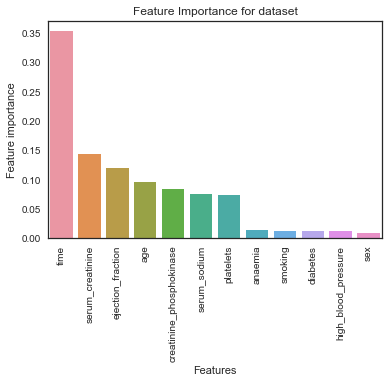

In [78]:
# Construct a pandas Dataframe which consist feature names and feature importances value
forest_importances = pd.DataFrame({ 'features': feature_names, 'importances': rf.feature_importances_ })
# Create barplot of feature importance
sns.barplot(x="features",y="importances" ,data=forest_importances,
            order=forest_importances.sort_values('importances',ascending = False).features)
plt.xticks(rotation=90)
plt.title("Feature Importance for dataset")
plt.ylabel("Feature importance")
plt.xlabel("Features")
fig.tight_layout()

--> Your Answer Here

As shown above, the most important variable is time, this variable has over twice of the importance than other features. Variables of serim_creatinine, ejection_fraction, age, creatinine_phosphaokinase, serum_sodium, and platelets have similar variable importance with the value range from 0.10 to 0.15. The least important variables are smoking, diabetes, anaemia, high_blood_pressure, and sex, which all have feature importance lower than 0.05.

---


### Question 2 - Unsupervised Learning - Clustering [ 16 pts]



**2)a) For this question we will work with the NFL dataset from [yellowbrick](https://www.scikit-yb.org/en/latest/api/datasets/nfl.html). Load the dataset, split it into X and y. We will only need X for this question. Print out X and print out the information for the dataset to make sure there are no categorical variables.** [ 2 pts]


In [79]:
# Load X and y from yellowbrick
X = load_nfl()[0]
y = load_nfl()[1]

In [80]:
print(X)

     Age   G  GS  Tgt  Rec  Ctch_Rate   Yds   Y/R  TD  Lng  ...  Fmb  C_pos  \
0     25  16  16  147  125      0.850  1405  11.2   9   72  ...    2      0   
1     28  16  16  156  116      0.744  1163  10.0   8   34  ...    1      0   
2     26  16  16  163  115      0.706  1572  13.7  11   49  ...    2      0   
3     29  16  16  170  113      0.665  1677  14.8   8   58  ...    2      0   
4     28  16  16  153  113      0.739  1373  12.2   9   68  ...    1      0   
..   ...  ..  ..  ...  ...        ...   ...   ...  ..  ...  ...  ...    ...   
489   24   3   0    1    1      1.000    14  14.0   0   14  ...    1      0   
490   24   3   0    1    1      1.000     1   1.0   0    1  ...    0      0   
491   35  16  16    1    1      1.000     9   9.0   0    9  ...    0      0   
492   30  16  16    1    1      1.000   -11 -11.0   0  -11  ...   10      0   
493   25  16   0    2    1      0.500    23  23.0   0   23  ...    0      0   

     CB_pos  DT_pos  FB_pos  QB_pos  RB_pos  T_pos 

In [81]:
# Print info of X to see if there are categorical variables
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        494 non-null    int64  
 1   G          494 non-null    int64  
 2   GS         494 non-null    int64  
 3   Tgt        494 non-null    int64  
 4   Rec        494 non-null    int64  
 5   Ctch_Rate  494 non-null    float64
 6   Yds        494 non-null    int64  
 7   Y/R        494 non-null    float64
 8   TD         494 non-null    int64  
 9   Lng        494 non-null    int64  
 10  Y/Tgt      494 non-null    float64
 11  R/G        494 non-null    float64
 12  Y/G        494 non-null    float64
 13  Fmb        494 non-null    int64  
 14  C_pos      494 non-null    int64  
 15  CB_pos     494 non-null    int64  
 16  DT_pos     494 non-null    int64  
 17  FB_pos     494 non-null    int64  
 18  QB_pos     494 non-null    int64  
 19  RB_pos     494 non-null    int64  
 20  T_pos     

**2)b) Fit a k-means model with the data from 2)a). For us to fit this model we must first determine an optimal k. Use a an elbow graph to plot a comprehensive range of k's and fit your model to the chosen k.** [ 4 pts]


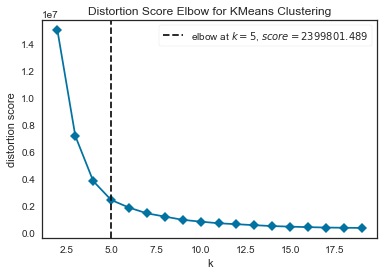

In [82]:
# Create a Kmeans model
model = KMeans(random_state=1)
# Run an elbow method from k=2 to k=20 to see which k is the best
visualizer = KElbowVisualizer(model, k=(2,20), timings = False)
visualizer.fit(X)
visualizer.show();

In [83]:
# Build and fit the K-means clustering using k = 5
model_elbow = KMeans(random_state=1, n_clusters=5).fit(X)

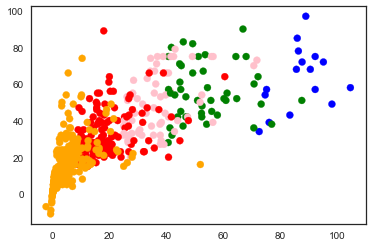

In [84]:
# Create one example of the clustering using varibales Y/G and Lng just to see how good the clustering is
colors = np.array(["red","green","blue","pink","orange","magenta","purple","cyan"])
plt.scatter(X['Y/G'], X['Lng'], c=colors[model_elbow.labels_])
plt.show()

**2)c) Repeat 2)a) using the Calinski-Harabasz metric. Did your k change or remain the same?** [ 4 pts]

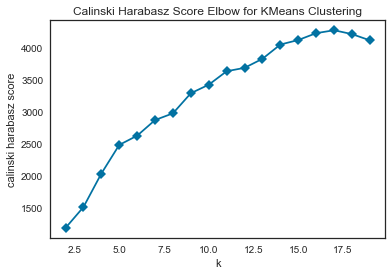

15


In [85]:
# Run a Calinski Harabasz method from k=2 to k=20 to see which k is the best
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz',timings=False, locate_elbow=False)
visualizer.fit(X)
visualizer.show();
# Print out the index of which the Calinski Harabasz score is the highest
print(visualizer.k_scores_.index(max(visualizer.k_scores_)))

In [86]:
# Build and fit the K-means clustering using k = 17
model_calinski = KMeans(random_state=1, n_clusters=17).fit(X)

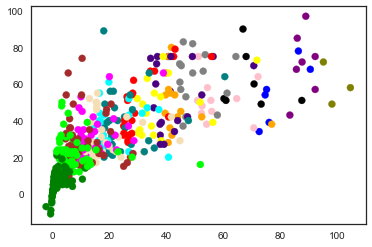

In [87]:
# One example of the clustering using varibales Y/G and Lng
colors = np.array(["red","green","blue","pink","orange","magenta","purple","cyan", "yellow", "grey", "black", "brown", "wheat", "teal", "lime", "olive", "indigo"])
plt.scatter(X['Y/G'], X['Lng'], c=colors[model_calinski.labels_])
plt.show()

--> Your answer here

The K for calinski-harabasz score elbow is 17, and the elbow method score is 5, which indicate that they are different.

**2)d) Examine your results from 2)a) and 2)c). How good are the clusters formed by each? What makes sense and what doesn't make sense?** [ 4 pts]

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


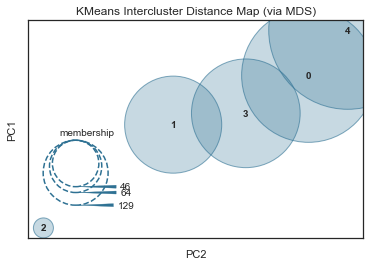

In [88]:
# Create an Intercluster Distance Map for elbow method which K = 5
visualizer = InterclusterDistance(model_elbow)
visualizer.fit(X)
visualizer.show();

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


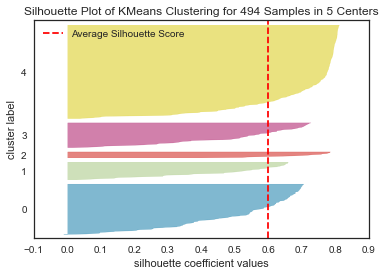

In [89]:
# Create a Sillhouette plot for elbow method which K = 5
visualizer = SilhouetteVisualizer(model_elbow, colors='yellowbrick')
visualizer.fit(X)
visualizer.show();

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


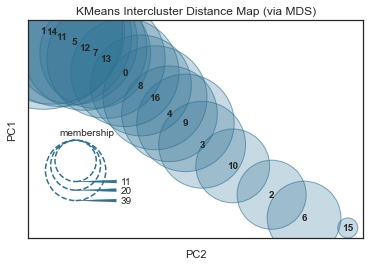

In [90]:
# Create an Intercluster Distance Map for Calinski method which K = 17
visualizer = InterclusterDistance(model_calinski)
visualizer.fit(X)
visualizer.show();

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


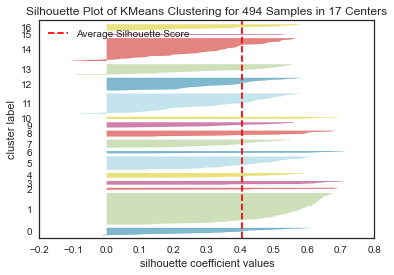

In [91]:
# Create a Sillhouette plot for Calinski method which K = 17
visualizer = SilhouetteVisualizer(model_calinski, colors='yellowbrick')
visualizer.fit(X)
visualizer.show();

--> Your answer here

Looking at the intercluster distance map for both K=5 and K=17, I can tell that K=5 performs better. First of all, the clusters are overlapping a lot in K=17, which means it is worse than K = 5, which only overlap by a little bit between 2 clusters. By lookign at the Silhouette Plot, we can see that the coefficient of some of the clusters in K = 17 have negative tail, which indicate that the cluster of that is not well, comparing to K = 5, which almost all of the coefficient values are larger than 0. Therefore, I conclude that K = 5 is a better K in this dataset.

**2)e) Go to yellowbrick [Feature Analysis Visualizers](https://www.scikit-yb.org/en/latest/api/features/index.html) and read through the categories. Creates a correlation plot with yellowbrick. Pick an additional plot and use it on your features. What did you learn from both plots?**[4pts]

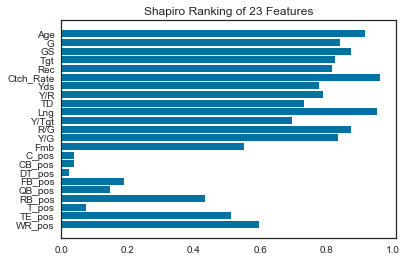

<AxesSubplot:title={'center':'Shapiro Ranking of 23 Features'}>

In [92]:
# Create an 1D shapiro ranking graph for all the features in X
from yellowbrick.features import Rank1D
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()

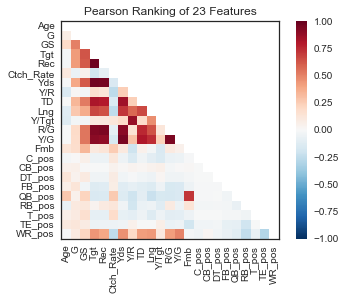

<AxesSubplot:title={'center':'Pearson Ranking of 23 Features'}>

In [93]:
# Create an 2D Pearson ranking graph for all the features in X
from yellowbrick.features import Rank2D
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()

--> Your answer here

The two plots above show the 1D and 2D of the feature importance and correlation plot to the dataset. From the 1D shapiro rank features graph, we are able to see that the top 3 ranked features are Ctch_Rate, Lng, and Age. From the 2D Pearson Ranking of 23 features we are able to see the correlation between each bariables. Some of them exhibit high correlations, for example, Rec and Tgt, Y/G and Tgt, Y/G and Yds, etc.

---

### Question 3 - Market Basket Analysis [ 12 pts]


**3)a) Begin by loading and cleaning the bread basket dataset.** [2 pts]

In [94]:
# Read bread basket csv
df = pd.read_csv('bread basket.csv')
df.info()
df.isnull().sum(axis=0)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


**3)b) From the dataset extract the transactions, and print out a single random transaction.** [ 2 pts]

In [95]:
# Create transaction Dataframe which contains the transaction number and the list of items in that transactions
transactions = df.groupby("Transaction")['Item'].apply(list).reset_index(name='items')
print(transactions.iloc[77])

Transaction                              79
items          [Fudge, Tea, Coffee, Muffin]
Name: 77, dtype: object


**3)c) Use the Transaction encoder on your transactions dataset. Print out your encoded transactions** [2 pts]

In [96]:
# Create a transaction encoder
encoder = TransactionEncoder()
enc = encoder.fit(transactions['items']).transform(transactions['items'])
# Create a dataframe of the encoded transaction with column names from Transactions
enc = pd.DataFrame(enc, columns=encoder.columns_)
print(enc)

      Adjustment  Afternoon with the baker  Alfajores  Argentina Night  \
0          False                     False      False            False   
1          False                     False      False            False   
2          False                     False      False            False   
3          False                     False      False            False   
4          False                     False      False            False   
...          ...                       ...        ...              ...   
9460       False                     False      False            False   
9461       False                     False      False            False   
9462       False                     False      False            False   
9463       False                     False      False            False   
9464       False                     False      False            False   

      Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  \
0        False  False     False     Fal

**3)d) Use the apriori algorithm and generate association rules to extract the most frequent itemsets.** [ 2 pts]

In [97]:
# Use the apriori algorithm and min_support = 0.05 to create the Dataframe after apriori algorithm and ready for association rule
ap = apriori(enc, min_support=0.005)
print(ap)

      support      itemsets
0    0.036344           (2)
1    0.016059           (6)
2    0.005071           (7)
3    0.327205          (11)
4    0.040042          (14)
..        ...           ...
109  0.007184  (73, 11, 23)
110  0.007396  (83, 11, 23)
111  0.006867  (48, 23, 15)
112  0.010037  (83, 23, 15)
113  0.005388  (73, 83, 23)

[114 rows x 2 columns]


In [98]:
# Use the association rule with metric of support and min_threshold of 0.01 to create the top 3 most frequent itemsets for the transacitons
sup = association_rules(ap, metric='support', min_threshold=0.01)
sup = sup.sort_values(by=['support'])
sup.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
73,(15),"(83, 23)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
71,(83),"(15, 23)",0.142631,0.054728,0.010037,0.070370,1.285822,0.002231,1.016827
70,"(15, 23)",(83),0.054728,0.142631,0.010037,0.183398,1.285822,0.002231,1.049923


--> Your answer here

After using the apriori algorithm and generate association rules of support, I am able to get the most frequent itemsets to be (15), (83), and (23).

**3)e) Play around with the generating association rules according to different thresholds. Comment on the levels of support, lift, and confidence of this dataset. What are the levels of your most popular itemsets? What are good thresholds?** [ 4 pts]

In [99]:
# Use for loop to create 9 association rules with metric of [support, lift, confidence] and min_threshold of [0.1, 0.01, 0.001] to create the top 3 most frequent itemsets for the transacitons
for metric in ['support', 'lift', 'confidence']:
    for threshold in [0.1, 0.01, 0.001]:
        ass_rules = association_rules(ap, metric=metric, min_threshold=threshold)
        # Sort the values by the metric
        ass_rules = ass_rules.sort_values(by=[metric])
        print('The association rules using metric', metric, 'and minimum threshold of', threshold, 'and generated the top 3 outputs and most frequent dataset are:')
        print(ass_rules.head(3))

The association rules using metric support and minimum threshold of 0.1 and generated the top 3 outputs and most frequent dataset are:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []
The association rules using metric support and minimum threshold of 0.01 and generated the top 3 outputs and most frequent dataset are:
   antecedents consequents  antecedent support  consequent support   support  \
73        (15)    (83, 23)            0.103856            0.049868  0.010037   
71        (83)    (15, 23)            0.142631            0.054728  0.010037   
70    (15, 23)        (83)            0.054728            0.142631  0.010037   

    confidence      lift  leverage  conviction  
73    0.096643  1.937977  0.004858    1.051779  
71    0.070370  1.285822  0.002231    1.016827  
70    0.183398  1.285822  0.002231    1.049923  
The association rules using metric support and minimum thresh

--> Your answer here

In this case, we use three different metrics (support, lift, confidence) and three different thresholds (0.1, 0.01, 0.001) to generate 9 differnet association rules. Looking at the results of 9 association rules, we are able to see that, first of all, minimum threshold of 0.1 might not be a good choice, since it cannot generate association rule for supply. 0.01 seems to be consistent along with 0.001, which out put almost the same itemsets instead of supply, but I would say I prefer using 0.001 for the consistency.

From supply and 0.001, we got the most frequent itemsets are (11), (49), (65); From lift and 0.001, we got the most frequent itemsets are (37), (23), (11); From supply and 0.001, we got the most frequent itemsets are (23), (23), (23). Therefore, from this result, we can see that the most popular itemsets are (11) and (23), followed by itemsets of (49), (65), (37).

---

### REFERENCES
List any references (even if these are previous homeworks, office hours, class exercises, websites, etc) you used to complete your homework. Even if they are one of the books assigned for this class. If this section is incomplete you will be deducted 50% of your final grade from this homework.

1. Plot trees for a Random Forest in Python with Scikit-Learn https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn
2. GridsearchCV with RandomForest https://stackoverflow.com/questions/45403482/gridsearchcv-with-randomforest
3. Yellowbrick https://www.scikit-yb.org/en/latest/api/datasets/nfl.html
4. Homework 2 of Data Mining
5. In-class exercise of Data Mining
6. Lab 3 of Data Mining
7. Lab 4 of Data Mining
8. Rank Features https://www.scikit-yb.org/en/latest/api/features/rankd.html
9. color example code: named_colors.py https://matplotlib.org/2.0.2/examples/color/named_colors.html



**Note: if there are no comments to explain your code you will receive 0 in this homework**

### Total Score:  --/50

### END OF HOMEWORK 3